<a href="https://colab.research.google.com/github/SukhBhagsar/SukhBhagsar/blob/main/Non_Casual_Transfer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#loading necessary libraries
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import word_tokenize
import string
from string import punctuation
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import os
import pandas as pd
from zipfile import ZipFile
from io import BytesIO

In [37]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from google.colab import drive
drive.mount('/content/drive')

dataset = '/content/topic_detect_final.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os
import pandas as pd
from zipfile import ZipFile
from io import BytesIO

In [24]:
# Applying function to read text file
def text_files(folder_data):
    text_data = []
    for file_name in os.listdir(folder_data):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_data, file_name), 'r', encoding='utf-8') as file:
                content = file.read()
                identifier = file_name[:-4]
                text_data.append({'identifier': identifier, 'content': content})
    return pd.DataFrame(text_data)

In [26]:
# Obtaining the zip file
zip_file_name = list(uploaded.keys())[0]
zip_file = BytesIO(uploaded[zip_file_name])

In [27]:
# Opening the zip file
with ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/extracted_files")

In [29]:
# Showing the Excel file path
excel_data_file = "/content/extracted_files/topic_detect/topics.xlsx"

In [30]:
# Reading the Excel file into a DataFrame
excel_dataframe = pd.read_excel(excel_data_file)

In [31]:
# Getting the folder path containing text files
text_folder_data = "/content/extracted_files/topic_detect/text"

In [32]:
# Loading text files from the folder
text_dataframe = text_files(text_folder_data)

In [35]:
# Merging the text data with the metadata DataFrame
merged_dataframe = pd.merge(excel_dataframe, text_dataframe, how='left', left_on='content', right_on='identifier')
print(merged_dataframe.head())

                                               title  \
0  Mitsubishi Motors Co. (OTCMKTS:MMTOF) Short In...   
1  Juventus off the hook! Bianconeri set to have ...   
2  Dodgers ponder shortstop for Betts after pater...   
3  Meta lays off tech teams, battering employee m...   
4  FDA clears extra COVID booster for some high-r...   

                                           content_x  content_word_count  \
0  29c9689e5ed81852967ff964f16be109a37dd9ecb1f5c9...               221.0   
1  b9e3313535ffdbc2fe198572f17ce61330980dfab64324...               225.0   
2  2e7bdbd8a033973c2309948b0b1b9de02bf7491e7b464c...               389.0   
3  d4e3c5c938a4c636d40cac488f32cda1cdc02c6372a5f9...               379.0   
4  cfd7f633608c252af099ccb7f4a5a02eed9e7c68efe6fb...               856.0   

        published_date          created_at          updated_at language  \
0  2023-04-19 07:26:42 2023-04-19 07:37:59 2023-04-19 07:37:59       en   
1  2023-04-19 06:23:09 2023-04-19 06:44:04 2023-04-19 07

In [41]:
# Check the first few documents in the DataFrame
print(merged_dataframe['content_y'].head())


Series([], Name: content_y, dtype: object)


In [42]:
# Inspect the DataFrame to check for any issues with the 'content_y' column
print(merged_dataframe.info())
print(merged_dataframe['content_y'].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               0 non-null      object        
 1   content_x           0 non-null      object        
 2   content_word_count  0 non-null      float64       
 3   published_date      0 non-null      object        
 4   created_at          0 non-null      datetime64[ns]
 5   updated_at          0 non-null      datetime64[ns]
 6   language            0 non-null      object        
 7   article_links       0 non-null      object        
 8   total_share_count   0 non-null      float64       
 9   keywords_status     0 non-null      float64       
 10  keywords            0 non-null      object        
 11  entities            0 non-null      object        
 12  sentiment           0 non-null      float64       
 13  title_sentiment     0 non-null      float64       
 14  keywor

In [1]:
import os
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Preprocessing text Data
def text_files(folder_data):
    text_data = []
    for file_name in os.listdir(folder_data):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_data, file_name), 'r', encoding='utf-8') as file:
                content = file.read()
                identifier = file_name[:-4]
                text_data.append({'identifier': identifier, 'content': content})
    return pd.DataFrame(text_data)

# Loading and Processing Data
from google.colab import files

uploaded = files.upload()  # Uploading the zip file

zip_file_name = list(uploaded.keys())[0]
zip_file = BytesIO(uploaded[zip_file_name])

with ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/extracted_files")

# Reading excel data file
excel_data_file = "/content/extracted_files/topic_detect/topics.xlsx"
excel_dataframe = pd.read_excel(excel_data_file)

# Loading text data
text_folder_data = "/content/extracted_files/topic_detect/text"
text_dataframe = text_files(text_folder_data)

# Merging text data with metadata DataFrame
merged_dataframe = pd.merge(excel_dataframe, text_dataframe, how='left', left_on='content', right_on='identifier')

#  Preprocessing text Data
text_data = merged_dataframe['content_x'].astype(str)
labels = merged_dataframe['topic']

# Applying Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
word_index = tokenizer.word_index

# Padding sequences
max_sequence_length = 1000
data = pad_sequences(sequences, maxlen=max_sequence_length)

# Loading Pre-trained GloVe Embeddings
embedding_dim = 100
glove_file = '/content/.vector_cache/glove.6B.100d.txt'

embeddings_index = {}
with open(glove_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Splitting Data
# Encoding labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)

# Defining Model
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(set(encoded_labels)), activation='softmax'))

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


Saving topic_detect_final.zip to topic_detect_final (3).zip
Epoch 1/5
63/63 [==============================] - 470s 7s/step - loss: 2.1092 - accuracy: 0.1681 - val_loss: 2.1087 - val_accuracy: 0.1679
Epoch 2/5
63/63 [==============================] - 464s 7s/step - loss: 2.1024 - accuracy: 0.1626 - val_loss: 2.1109 - val_accuracy: 0.1594
Epoch 3/5
63/63 [==============================] - 448s 7s/step - loss: 2.1013 - accuracy: 0.1654 - val_loss: 2.1084 - val_accuracy: 0.1594
Epoch 4/5
63/63 [==============================] - 458s 7s/step - loss: 2.1001 - accuracy: 0.1620 - val_loss: 2.1162 - val_accuracy: 0.1519
Epoch 5/5
63/63 [==============================] - 22s 348ms/step - loss: 2.1117 - accuracy: 0.1594
Test accuracy: 0.15942029654979706


In [4]:
from sklearn.metrics import roc_auc_score

# Calculating ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print('ROC AUC Score:', roc_auc)


ROC AUC Score: 0.49993614237469963


63/63 [==============================] - 22s 340ms/step


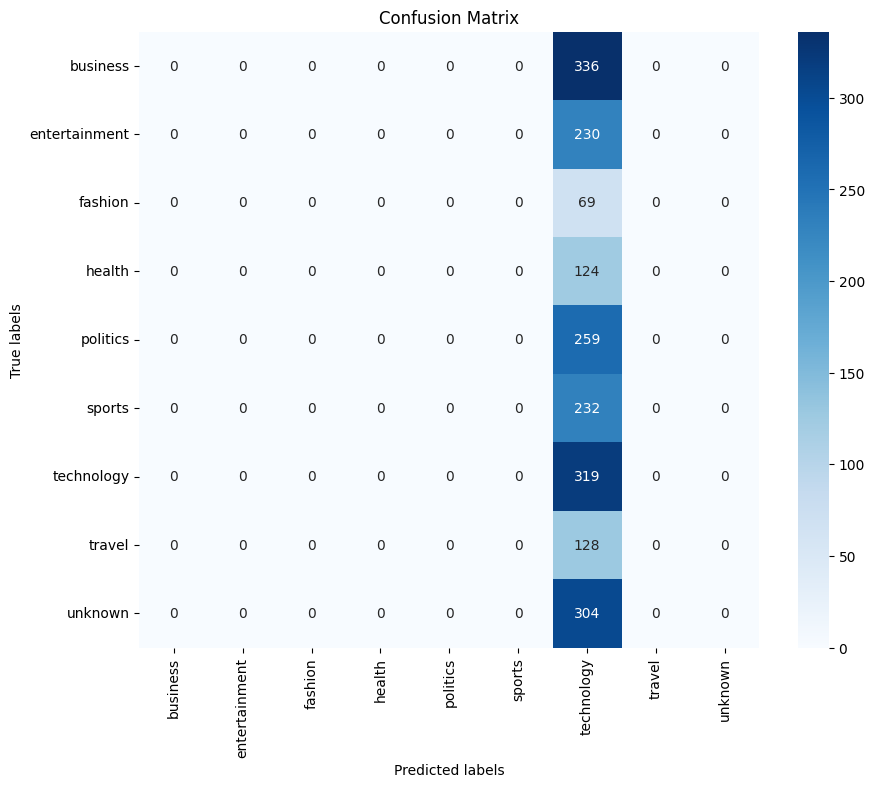

In [11]:
# Generating predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
